<a href="https://colab.research.google.com/github/Andoniadou-Lab/consensus_pituitary_atlas/blob/main/supp_fig_1_peaks_celltype_representation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install packages


In [1]:
!pip install scanpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.9/169.9 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.4/276.4 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 90.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 kB 4.6 MB/s eta 0:00:00


# Mounting Drive onto colab

In [3]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import scanpy as sc
adata = sc.read_h5ad("/content/drive/MyDrive/pituitary_atlas/Unstructured/pb_h5ad_0904.h5ad")
adata


AnnData object with n_obs × n_vars = 258 × 228058
    obs: 'sample', 'cell_type', 'Sex', '_scvi_batch', '_scvi_labels', 'psbulk_n_cells', 'psbulk_counts'
    var: 'count', 'selected'
    layers: 'psbulk_props'

In [5]:
#convert to floats
adata.obs["psbulk_counts"] = adata.obs["psbulk_counts"].astype(float)
adata.obs["psbulk_n_cells"] = adata.obs["psbulk_n_cells"].astype(float)

adata.obs["psbulk_counts_per_cell"] = adata.obs["psbulk_counts"].values / adata.obs["psbulk_n_cells"].values
#run sc qc
sc.pp.calculate_qc_metrics(adata, inplace=True)
adata.obs

,sample,cell_type,Sex,_scvi_batch,_scvi_labels,psbulk_n_cells,psbulk_counts,psbulk_counts_per_cell,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes
GSM4594382_Corticotrophs,GSM4594382,Corticotrophs,1.0,0,0,107.0,1559646.0,14576.130841,160681,11.987183,1559646.0,14.259970,0.523965,0.982467,1.819387,4.029248
GSM4594385_Corticotrophs,GSM4594385,Corticotrophs,0.0,3,0,264.0,2152282.0,8152.583333,165602,12.017349,2152282.0,14.582040,0.601269,1.126246,2.103302,4.686375
GSM4594386_Corticotrophs,GSM4594386,Corticotrophs,0.0,4,0,391.0,1759613.0,4500.289003,169223,12.038979,1759613.0,14.380605,0.559839,1.051083,1.950770,4.305663
GSM4594387_Corticotrophs,GSM4594387,Corticotrophs,0.0,5,0,571.0,2577337.0,4513.725044,182757,12.115918,2577337.0,14.762268,0.524223,0.983224,1.834723,4.098339
GSM4594388_Corticotrophs,GSM4594388,Corticotrophs,0.0,6,0,663.0,5128298.0,7734.989442,200554,12.208844,5128298.0,15.450285,0.523293,0.985434,1.834975,4.087711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM7807751_Thyrotrophs,GSM7807751,Thyrotrophs,0.0,26,0,111.0,542951.0,4891.450450,139379,11.844959,542951.0,13.204776,0.444792,0.839118,1.575649,3.550597
GSM7807753_Thyrotrophs,GSM7807753,Thyrotrophs,0.0,28,0,124.0,732425.0,5906.653226,155175,11.952315,732425.0,13.504118,0.442912,0.837901,1.575588,3.575110
GSM7807754_Thyrotrophs,GSM7807754,Thyrotrophs,0.0,29,0,203.0,1624162.0,8000.798030,191154,12.160840,1624162.0,14.300503,0.405625,0.764579,1.442713,3.274427
GSM7807755_Thyrotrophs,GSM7807755,Thyrotrophs,0.0,30,0,138.0,745925.0,5405.253623,150967,11.924823,745925.0,13.522382,0.496833,0.931595,1.742534,3.906023


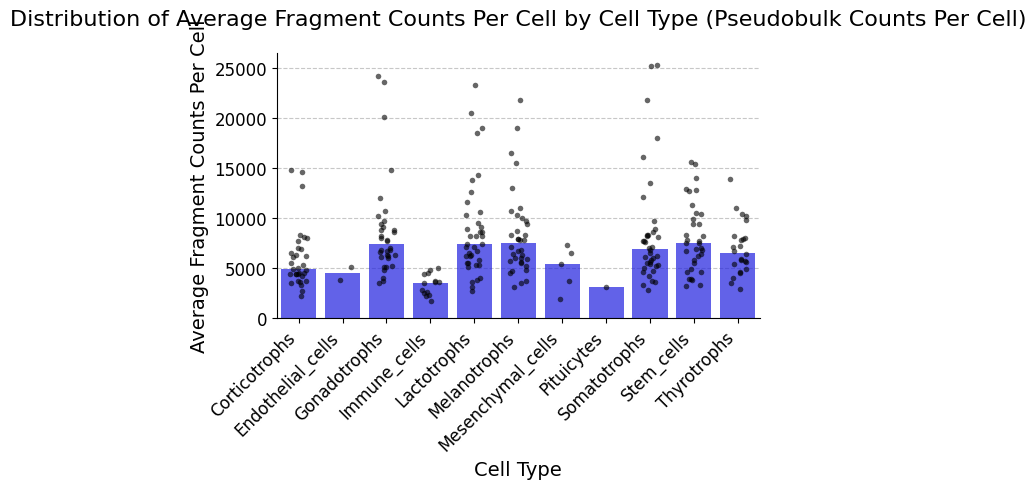

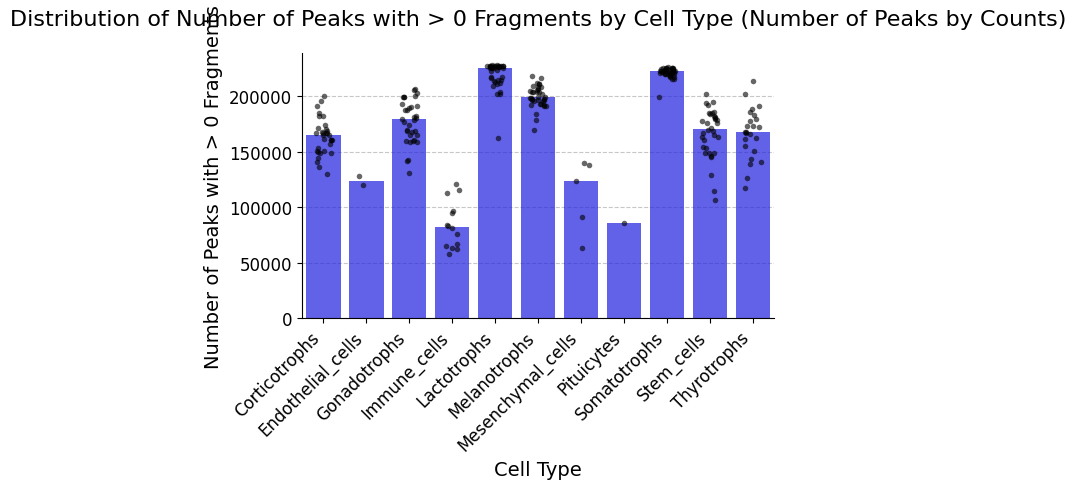

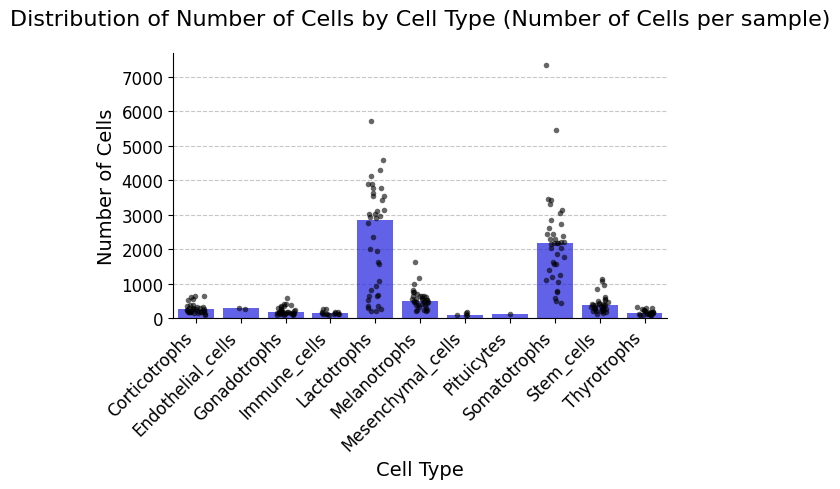

In [8]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np


def plot_strip_barplot(adata_obj, metric_col, cell_type_col="cell_type", title_suffix="", y_label=""):
    """
    Generates a nature journal style tidy strip-barplot.

    Args:
        adata_obj (anndata.AnnData): The anndata object containing the data.
        metric_col (str): The name of the column in adata.obs to plot on the y-axis.
        cell_type_col (str): The name of the column in adata.obs for cell types (x-axis).
        title_suffix (str): Additional text for the plot title.
        y_label (str): Label for the y-axis.
    """
    df_plot = adata_obj.obs.copy()

    plt.figure(figsize=(6, 5))
    ax = plt.gca()


    sns.barplot(
        data=df_plot,
        x=cell_type_col,
        y=metric_col,
        estimator=np.median,
        errorbar=None,
        color = '#0000ff',
        alpha=0.7,
        ax=ax
    )

    sns.stripplot(
        data=df_plot,
        x=cell_type_col,
        y=metric_col,
        jitter=0.2,
        color="black",
        size=4,
        alpha=0.6,
        ax=ax
    )

    ax.set_title(f'Distribution of {y_label} by Cell Type {title_suffix}', fontsize=16, pad=20)
    ax.set_xlabel('Cell Type', fontsize=14)
    ax.set_ylabel(y_label, fontsize=14)

    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)

    sns.despine(ax=ax, top=True, right=True)

    ax.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)
    ax.set_axisbelow(True)

    plt.savefig(f'distribution_of_{metric_col}_by_cell_type{title_suffix}.png', dpi=400, bbox_inches='tight')
    plt.savefig(f'distribution_of_{metric_col}_by_cell_type{title_suffix}.svg', format='svg', dpi=400, bbox_inches='tight')

    plt.tight_layout()
    plt.show()

# Plot for 'psbulk_counts_per_cell'
plot_strip_barplot(
    adata_obj=adata,
    metric_col='psbulk_counts_per_cell',
    title_suffix='(Pseudobulk Counts Per Cell)',
    y_label='Average Fragment Counts Per Cell'
)

# Plot for 'n_genes_by_counts'
plot_strip_barplot(
    adata_obj=adata,
    metric_col='n_genes_by_counts',
    title_suffix='(Number of Peaks by Counts)',
    y_label='Number of Peaks with > 0 Fragments'
)

# Plot for 'n_genes_by_counts'
plot_strip_barplot(
    adata_obj=adata,
    metric_col="psbulk_n_cells",
    title_suffix='(Number of Cells per sample)',
    y_label='Number of Cells'
)